In [18]:
import model
import pandas as pd

def _get_graph_data(df, source_col, sink_col, weight_col):

    nodes = df[[source_col, sink_col]].to_numpy().ravel()
    edges = df[[source_col, sink_col]].to_numpy()
    weights = df[weight_col].to_numpy()

    return nodes, edges, weights

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('test-cases/Nodes(3)_Edges(2)/graph_3_2_(0).csv', sep=',')

In [5]:
df

,Source,Sink,Weight
0,0,2,12.58
1,1,2,4.19


In [6]:
active_edges, status = model.optimize(df.to_numpy())


Problem: 
- Name: unknown
  Lower bound: None
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 2
  Number of binary variables: 6
  Number of integer variables: 6
  Number of nonzeros: 2
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
  Error rc: 0
  Time: 0.044580936431884766
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



### OBJECTIVE: 10.48

### DEACTIVATED EDGES
Edge(1.0, 2.0) 0.0

Total deactivated edges: 1


In [6]:
active_edges

[(1.0, 2.0, 18.26)]

In [27]:
with open('results.csv', 'w') as f:
    print('NumNodes,NumEdges,ExecTime', file=f)

sorted_by_num_nodes = sorted(
    os.listdir('test-cases'), 
    key=lambda n: int(n.split('_')[0].replace('Nodes(', '').replace(')', '')))

for a in sorted_by_num_nodes:
    b = os.path.join('test-cases', a)
    
    exec_times = []
    for file in os.listdir(b):
        path = os.path.join(b, file)
        df = pd.read_csv(path, sep=',')
        
        num_nodes = len(set(df['Source'].tolist() + df['Sink'].tolist()))
        num_edges = len(df)
        
        active_edges, status = model.optimize(df.to_numpy())
        
        exec_times.append(list(status['Solver'])[0]['Time'])
        
    with open('results.csv', 'a') as f:
        print(f'{num_nodes},{num_edges},{sum(exec_times) / len(exec_times)}', file=f)
        
    print(f'{a},{sum(exec_times) / len(exec_times)}')

Nodes(3)_Edges(2),0.04081811904907227
Nodes(5)_Edges(5),0.05076389312744141
Nodes(7)_Edges(11),0.04715795516967773
Nodes(9)_Edges(18),0.060308647155761716
Nodes(11)_Edges(28),0.13424243927001953
Nodes(13)_Edges(39),0.1911531448364258
Nodes(15)_Edges(53),0.36898064613342285
Nodes(17)_Edges(68),0.829182767868042
Nodes(19)_Edges(86),1.5416050910949708
Nodes(21)_Edges(105),6.735115051269531
Nodes(23)_Edges(127),21.3499804019928


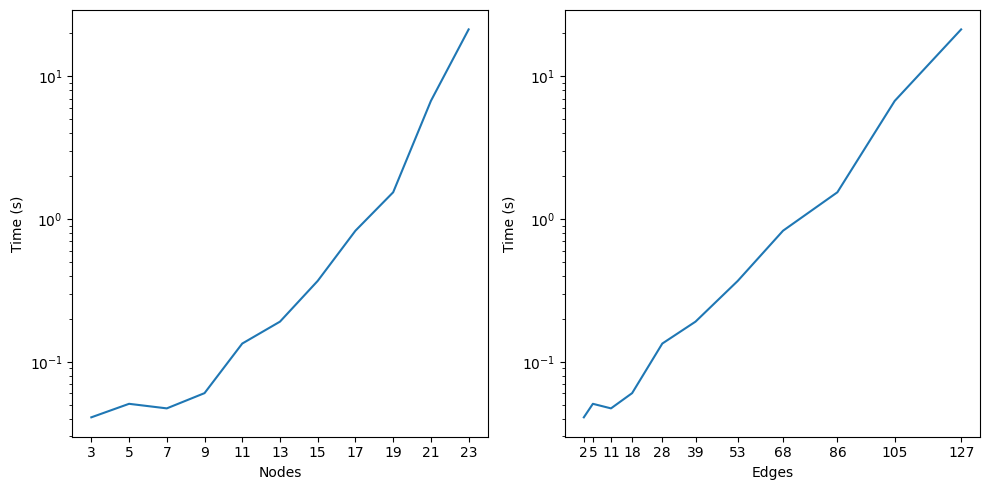

In [36]:
results = pd.read_csv('results.csv', sep=',')

plt.figure(figsize=(10, 5))

plt.subplot(121).set_xlabel('Nodes')
plt.subplot(121).set_ylabel('Time (s)')
plt.subplot(121).set_xticks(results['NumNodes'], results['NumNodes'])
plt.subplot(121).plot(results['NumNodes'], results['ExecTime'])

plt.subplot(122).set_xlabel('Edges')
plt.subplot(122).set_ylabel('Time (s)')
plt.subplot(122).set_xticks(results['NumEdges'], results['NumEdges'])
plt.subplot(122).plot(results['NumEdges'], results['ExecTime'])

plt.tight_layout()

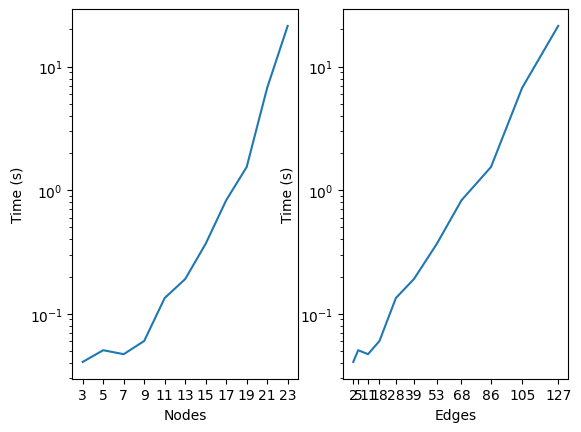

In [37]:
results = pd.read_csv('results.csv', sep=',')

plt.figure(figsize=(10, 5))

plt.subplot(121).set_xlabel('Nodes')
plt.subplot(121).set_ylabel('Time (s)')
plt.subplot(121).set_yscale('log')
plt.subplot(121).set_xticks(results['NumNodes'], results['NumNodes'])
plt.subplot(121).plot(results['NumNodes'], results['ExecTime'])

plt.subplot(122).set_xlabel('Edges')
plt.subplot(122).set_ylabel('Time (s)')
plt.subplot(122).set_yscale('log')
plt.subplot(122).set_xticks(results['NumEdges'], results['NumEdges'])
plt.subplot(122).plot(results['NumEdges'], results['ExecTime'])

plt.tight_layout()